# DATA CLASSIFICATION AND MODELING
Here, we will attmept to model the data in order to predict (classify) album scores

In [2]:
#obligatory set up code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

from scipy.stats import norm
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

plt.style.use('ggplot')

%matplotlib inline

In [18]:
#bring data from data_acquisition to this notebook
nd_data = pd.read_csv('needledrop_data.csv')
scores = nd_data.iloc[:,2]
basics = nd_data[['year','track count','duration']]

means = [m for m in list(nd_data.columns.values) if 'mean' in m]
means = nd_data[means]
means = pd.concat([basics,means], axis=1)
                  
stds = [s for s in list(nd_data.columns.values) if 'std' in s]
stds = nd_data[stds]
stds = pd.concat([basics,stds], axis=1)
                 
medians = [m for m in list(nd_data.columns.values) if '50%' in m]
medians = nd_data[medians]
medians = pd.concat([basics,medians], axis=1)

#split data sets into training and testing data
scores_train, scores_test = train_test_split(scores, test_size=0.25)
means_train, means_test = train_test_split(means, test_size=0.25)
stds_train, stds_test = train_test_split(stds, test_size=0.25)
medians_train, medians_test = train_test_split(medians, test_size=0.25)

In [19]:
len(means_train)

1314

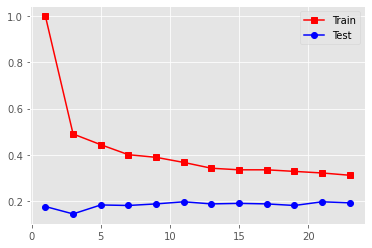

In [21]:
kvals = range(1,25,2)
train_score = []
test_score = []

for k in kvals:
    model = neighbors.KNeighborsClassifier(k)
    model.fit(means_train,scores_train)
    train_score.append(model.score(means_train, scores_train))
    test_score.append(model.score(means_test, scores_test))
#TODO: the model can be created with a weight functionion. 
# Use this in conjunction with the confidence columns to weight the corresponding columns
plt.plot(kvals, train_score, 'r-s', label='Train')
plt.plot(kvals, test_score, 'b-o', label='Test')
plt.legend()
plt.show()

In [ ]:

for k in kvals:
    model = neighbors.KNeighborsClassifier(k)
    model.fit(train[['x','y']], train['class'])
    train_score.append(model.score(train[['x','y']], train['class']))
    test_score.append(model.score(test[['x','y']], test['class']))
    
plt.plot(kvals, train_score, 'r-s', label='Train')
plt.plot(kvals, test_score, 'b-o', label='Test')
plt.legend()
plt.show()